In [1]:
import sys
import os
import math
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from math import sqrt
from sklearn.metrics import confusion_matrix

if not sys.warnoptions:
    warnings.simplefilter("ignore")

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
sns.set_style('white')

import plotly.graph_objects as go
from datetime import datetime

In [2]:
# read data
year = 2018
ticker = 'IFM'

col_names=['TIME', 'X', 'Y', 'Z'] 

df_2018 = pd.read_csv(os.path.join(f'../data/index/{year}/{ticker}.csv'), index_col=0, encoding='gbk')
df_2018.columns = ['code', 'time', 'open', 'high', 'low', 'close', 'volume', 'turnover', 'open_interest']

df_2018.rename_axis("type", axis='index', inplace=True)

year = 2019

df_2019 = pd.read_csv(os.path.join(f'../data/index/{year}/{ticker}.csv'), index_col=0, encoding='gbk')
df_2019.columns = ['code', 'time', 'open', 'high', 'low', 'close', 'volume', 'turnover', 'open_interest']

df_2019.rename_axis("type", axis='index', inplace=True)

year = 2020

df_2020 = pd.read_csv(os.path.join(f'../data/index/{year}/{ticker}.csv'), index_col=0, encoding='gbk')
df_2020.columns = ['code', 'time', 'open', 'high', 'low', 'close', 'volume', 'turnover', 'open_interest']

df_2020.rename_axis("type", axis='index', inplace=True)


df = pd.concat([df_2018, df_2019, df_2020])
df['time'] = pd.to_datetime(df['time'])

df.reset_index(inplace=True)
df['start'] = df['time'] - pd.Timedelta(minutes=1)
df['end'] = df['time']

df['date'] = df['time'].map(lambda x: x.year)*10000 + df['time'].map(lambda x: x.month)*100 + df['time'].map(lambda x: x.day)
# df = df.iloc[144000:146400, :] # Change this line to change the selection of data

df

,type,code,time,open,high,low,close,volume,turnover,open_interest,start,end,date
0,SF,IF1801,2018-01-02 09:31:00,4051.6,4060.4,4051.6,4060.0,398.0,4.844222e+08,24365,2018-01-02 09:30:00,2018-01-02 09:31:00,20180102
1,SF,IF1801,2018-01-02 09:32:00,4060.0,4062.2,4058.6,4060.0,212.0,2.582576e+08,24241,2018-01-02 09:31:00,2018-01-02 09:32:00,20180102
2,SF,IF1801,2018-01-02 09:33:00,4059.8,4065.8,4059.8,4062.8,179.0,2.181614e+08,24118,2018-01-02 09:32:00,2018-01-02 09:33:00,20180102
3,SF,IF1801,2018-01-02 09:34:00,4062.6,4063.0,4060.0,4062.6,117.0,1.425521e+08,24049,2018-01-02 09:33:00,2018-01-02 09:34:00,20180102
4,SF,IF1801,2018-01-02 09:35:00,4062.8,4070.8,4062.4,4070.0,251.0,3.062792e+08,23926,2018-01-02 09:34:00,2018-01-02 09:35:00,20180102
...,...,...,...,...,...,...,...,...,...,...,...,...,...
175195,SF,IF2101,2020-12-31 14:56:00,5217.8,5218.4,5216.4,5217.8,468.0,7.325071e+08,89496,2020-12-31 14:55:00,2020-12-31 14:56:00,20201231
175196,SF,IF2101,2020-12-31 14:57:00,5217.8,5219.8,5216.6,5219.0,502.0,7.858570e+08,89727,2020-12-31 14:56:00,2020-12-31 14:57:00,20201231
175197,SF,IF2101,2020-12-31 14:58:00,5219.0,5219.0,5215.0,5218.2,704.0,1.101811e+09,90073,2020-12-31 14:57:00,2020-12-31 14:58:00,20201231
175198,SF,IF2101,2020-12-31 14:59:00,5218.2,5221.6,5216.8,5220.4,610.0,9.551740e+08,90469,2020-12-31 14:58:00,2020-12-31 14:59:00,20201231


In [3]:
from cta.kline import Kline
from cta.kline_sindex import *

In [4]:
timespan = df.shape[0]
frequency = 30

df_kline = Kline_Sindex(df, 1)

In [5]:
# plot 30 min k-line
df_kline30 = df_kline.construct_backward_klines(ckfreq=frequency, numkrows=(timespan // frequency))
# df_kline30.plot_k()

In [6]:
frequency = 120
# plot 120 min k-line
# df_kline120 = df_kline.construct_backward_klines(ckfreq=frequency, numkrows=(timespan // frequency))
# df_kline120.plot_k()

计算高点和低点的 Hull Moving Average, 可以调整 hma_span

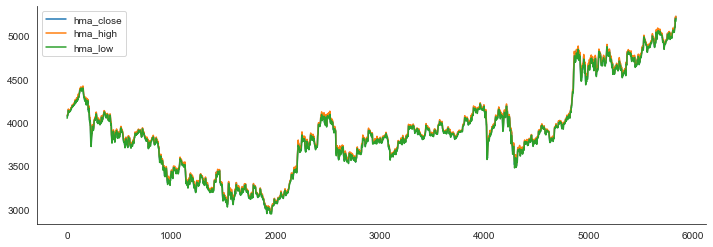

In [7]:
# reverse the dataframe since the k-line lib reversed it
df_kline30r = df_kline30.iloc[::-1].copy()
df_kline30r.reset_index(inplace=True)
hma_span = 5 # period for HMA 

df_kline30r['window_t_ewm_low'] = df_kline30r['low'].ewm(span=hma_span).mean()
df_kline30r['window_half_ewm_low'] = df_kline30r['low'].ewm(span=hma_span/2).mean()
df_kline30r['diff_low']=df_kline30r['window_half_ewm_low'] * 2 - df_kline30r['window_t_ewm_low']
df_kline30r['hma_low']=df_kline30r['diff_low'].ewm(span=int(math.sqrt(hma_span))).mean()

df_kline30r['window_t_ewm_high'] = df_kline30r['high'].ewm(span=hma_span).mean()
df_kline30r['window_half_ewm_high'] = df_kline30r['high'].ewm(span=hma_span/2).mean()
df_kline30r['diff_high']=df_kline30r['window_half_ewm_high'] * 2 - df_kline30r['window_t_ewm_high']
df_kline30r['hma_high']=df_kline30r['diff_high'].ewm(span=int(math.sqrt(hma_span))).mean()

df_kline30r['window_t_ewm_close'] = df_kline30r['close'].ewm(span=hma_span).mean()
df_kline30r['window_half_ewm_close'] = df_kline30r['close'].ewm(span=hma_span/2).mean()
df_kline30r['diff_close']=df_kline30r['window_half_ewm_close'] * 2 - df_kline30r['window_t_ewm_close']
df_kline30r['hma_close']=df_kline30r['diff_close'].ewm(span=int(math.sqrt(hma_span))).mean()

intermediate_col = ['index', 'window_t_ewm_low', 'window_half_ewm_low', 'diff_low', 
                    'window_t_ewm_high', 'window_half_ewm_high', 'diff_high', 
                   'window_t_ewm_close', 'window_half_ewm_close', 'diff_close']

df_kline30r.drop(columns=intermediate_col, inplace = True)

df_kline30r[['hma_close', 'hma_high', 'hma_low']].plot(grid=False, figsize=(12,4))
sns.despine()

通过 HMA 的斜率计算趋势，只有当高线和低线趋势一致时才判断趋势存在

In [8]:
df_kline30r["trend_low"] = (df_kline30r["hma_low"] > df_kline30r["hma_low"].shift(1))
df_kline30r["trend_high"] = (df_kline30r["hma_high"] > df_kline30r["hma_high"].shift(1))

df_kline30r["slope_low"] = (df_kline30r["hma_low"] - df_kline30r["hma_low"].shift(1))
df_kline30r["slope_high"] = (df_kline30r["hma_high"] - df_kline30r["hma_high"].shift(1))
df_kline30r["slope_close"] = (df_kline30r["hma_close"] - df_kline30r["hma_close"].shift(1))

df_kline30r['slope_low'] = df_kline30r['slope_low'].fillna(0)
df_kline30r['slope_high'] = df_kline30r['slope_high'].fillna(0)
df_kline30r["slope_close"] = df_kline30r['slope_close'].fillna(0)

df_kline30r.replace({'trend_low': {True: 1, False: -1}}, inplace=True)
df_kline30r.replace({'trend_high': {True: 1, False: -1}}, inplace=True)

df_kline30r["trend_ma"] = df_kline30r["trend_low"] + df_kline30r["trend_high"]

df_kline30r.replace({'trend_ma': {2: 1, -2: -1}}, inplace=True)

df_kline30r

,start,end,low,high,open,close,hma_low,hma_high,hma_close,trend_low,trend_high,slope_low,slope_high,slope_close,trend_ma
0,2018-01-02 09:30:00,2018-01-02 10:00:00,4051.6,4081.8,4051.6,4075.2,4051.600000,4081.800000,4075.200000,-1,-1,0.000000,0.000000,0.000000,-1
1,2018-01-02 10:00:00,2018-01-02 10:30:00,4065.0,4085.4,4074.2,4085.0,4059.640000,4083.960000,4081.080000,1,1,8.040000,2.160000,5.880000,1
2,2018-01-02 10:30:00,2018-01-02 11:00:00,4079.0,4093.8,4084.2,4084.4,4070.622352,4089.373117,4083.357798,1,1,10.982352,5.413117,2.277798,1
3,2018-01-02 11:00:00,2018-01-02 11:30:00,4081.4,4095.2,4084.4,4086.8,4077.766454,4093.144227,4085.503779,1,1,7.144102,3.771110,2.145981,1
4,2018-01-02 13:00:00,2018-01-02 13:30:00,4085.8,4095.2,4088.4,4095.2,4083.394528,4094.957332,4090.977611,1,1,5.628074,1.813104,5.473832,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5835,2020-12-31 11:00:00,2020-12-31 11:30:00,5151.0,5204.4,5200.0,5165.2,5177.091370,5219.916282,5192.336200,-1,-1,-11.572427,-1.403806,-16.328129,-1
5836,2020-12-31 13:00:00,2020-12-31 13:30:00,5155.2,5189.4,5165.6,5185.0,5167.506095,5207.874866,5189.485667,-1,-1,-9.585275,-12.041416,-2.850533,-1
5837,2020-12-31 13:30:00,2020-12-31 14:00:00,5183.2,5204.6,5185.0,5198.6,5176.831510,5207.176046,5196.227171,1,-1,9.325415,-0.698820,6.741505,0
5838,2020-12-31 14:00:00,2020-12-31 14:30:00,5192.4,5225.6,5198.6,5225.6,5188.698956,5218.940831,5215.116671,1,1,11.867446,11.764785,18.889500,1


计算 Average True Range，可以更改 atr_span

In [9]:
atr_span = 10
def calculate_average_true_range(df, atr_span):
    df['TR1'] = abs(df['high'] - df['low'])
    df['TR2'] = abs(df['high'] - df['close'].shift())
    df['TR3'] = abs(df['low'] - df['close'].shift())
    df['true_range'] = df[['TR1', 'TR2', 'TR3']].max(axis=1)
    df['atr'] = df['true_range'].ewm(span = atr_span).mean()
    
    df_kline30r.drop(columns=['TR1', 'TR2', 'TR3'], inplace = True)
    
    return df

df_kline30r = calculate_average_true_range(df_kline30r, 10)

通过 ATR 判断趋势 仅当高线和低线的均线变化幅度均超过 ATR * M 时判断趋势存在  
可以调整 M 的取值

In [10]:
atr_m = 0.1
df_kline30r["trend_atr_up"] = ((df_kline30r["slope_high"] > df_kline30r["atr"] * atr_m) & 
                               (df_kline30r["slope_low"] > df_kline30r["atr"] * atr_m) & 
                              (df_kline30r["slope_close"] > df_kline30r["atr"] * atr_m) )
df_kline30r["trend_atr_down"] = ((df_kline30r["slope_high"] < df_kline30r["atr"] * -atr_m) & 
                               (df_kline30r["slope_low"] < df_kline30r["atr"] * -atr_m) & 
                                (df_kline30r["slope_close"] < df_kline30r["atr"] * atr_m))

df_kline30r.replace({'trend_atr_up': {True: 1, False: 0}}, inplace=True)
df_kline30r.replace({'trend_atr_down': {True: -1, False: 0}}, inplace=True)

df_kline30r["trend_atr"] = df_kline30r["trend_atr_up"] + df_kline30r["trend_atr_down"]
df_kline30r["trend"] = df_kline30r["trend_atr"] + df_kline30r["trend_ma"]
df_kline30r.replace({'trend': {2: 1, 1: 0, -1: 0, -2: -1}}, inplace=True)

df_kline30r["trend"] = (df_kline30r["trend"] * 2 + df_kline30r["trend"].shift()) / 3
df_kline30r['trend'] = df_kline30r['trend'].fillna(0)
df_kline30r["trend"] = df_kline30r["trend"].round()

df_kline30r.iloc[10:20, ]

,start,end,low,high,open,close,hma_low,hma_high,hma_close,trend_low,trend_high,slope_low,slope_high,slope_close,trend_ma,true_range,atr,trend_atr_up,trend_atr_down,trend_atr,trend
10,2018-01-03 10:30:00,2018-01-03 11:00:00,4130.4,4151.0,4134.4,4147.6,4120.890991,4144.031540,4140.787171,1,1,16.637906,17.095240,17.132338,1,20.6,18.417262,1,0,1,1.0
11,2018-01-03 11:00:00,2018-01-03 11:30:00,4137.2,4153.4,4147.6,4151.8,4134.104876,4154.092512,4151.824934,1,1,13.213886,10.060972,11.037763,1,16.2,17.974257,1,0,1,1.0
12,2018-01-03 13:00:00,2018-01-03 13:30:00,4137.8,4152.0,4152.0,4142.2,4140.576600,4157.211160,4151.151314,1,1,6.471723,3.118648,-0.673620,1,14.2,17.233487,0,0,0,0.0
13,2018-01-03 13:30:00,2018-01-03 14:00:00,4120.6,4142.2,4140.8,4125.8,4133.291084,4152.042088,4139.750714,-1,-1,-7.285516,-5.169072,-11.400600,-1,21.6,18.078291,0,-1,-1,-1.0
14,2018-01-03 14:00:00,2018-01-03 14:30:00,4124.0,4139.0,4125.8,4133.0,4128.848933,4145.898229,4135.591916,-1,-1,-4.442151,-6.143859,-4.158799,-1,15.0,17.489585,0,-1,-1,-1.0
15,2018-01-03 14:30:00,2018-01-03 15:00:00,4116.8,4134.4,4133.0,4121.6,4122.575907,4139.620344,4127.889580,-1,-1,-6.273026,-6.277885,-7.702336,-1,17.6,17.510504,0,-1,-1,-1.0
16,2018-01-04 09:30:00,2018-01-04 10:00:00,4115.8,4128.0,4122.0,4121.4,4118.241087,4132.602369,4123.100076,-1,-1,-4.334820,-7.017974,-4.789504,-1,12.2,16.512013,0,-1,-1,-1.0
17,2018-01-04 10:00:00,2018-01-04 10:30:00,4116.6,4131.6,4121.4,4126.8,4116.551951,4130.659316,4123.870416,-1,-1,-1.689136,-1.943053,0.770340,-1,15.0,16.229474,0,-1,-1,-1.0
18,2018-01-04 10:30:00,2018-01-04 11:00:00,4121.0,4131.2,4126.6,4130.4,4118.406652,4130.151848,4127.069031,1,-1,1.854702,-0.507468,3.198616,0,10.2,15.108445,0,0,0,-0.0
19,2018-01-04 11:00:00,2018-01-04 11:30:00,4126.2,4136.8,4130.6,4133.2,4122.733224,4133.209925,4130.706573,1,1,4.326571,3.058077,3.637541,1,10.6,14.273642,1,0,1,1.0


在30分钟K线上增加 Trend

In [11]:
# Inverse here because we inversed before
df_kline30["high_ma5"] = df_kline30r['hma_high'].values[::-1]
df_kline30["low_ma5"] = df_kline30r['hma_low'].values[::-1]
df_kline30["trend5"] = df_kline30r['trend'].values[::-1]

# df_kline30.plot_k(plot_ma=True, ma=5)

In [12]:
df_kline30

,start,end,low,high,open,close,high_ma5,low_ma5,trend5
0,2020-12-31 14:30:00,2020-12-31 15:00:00,5215.0,5231.2,5225.6,5227.0,5229.411208,5207.070646,1.0
1,2020-12-31 14:00:00,2020-12-31 14:30:00,5192.4,5225.6,5198.6,5225.6,5218.940831,5188.698956,1.0
2,2020-12-31 13:30:00,2020-12-31 14:00:00,5183.2,5204.6,5185.0,5198.6,5207.176046,5176.831510,-0.0
3,2020-12-31 13:00:00,2020-12-31 13:30:00,5155.2,5189.4,5165.6,5185.0,5207.874866,5167.506095,-1.0
4,2020-12-31 11:00:00,2020-12-31 11:30:00,5151.0,5204.4,5200.0,5165.2,5219.916282,5177.091370,0.0
...,...,...,...,...,...,...,...,...,...
5835,2018-01-02 13:00:00,2018-01-02 13:30:00,4085.8,4095.2,4088.4,4095.2,4094.957332,4083.394528,1.0
5836,2018-01-02 11:00:00,2018-01-02 11:30:00,4081.4,4095.2,4084.4,4086.8,4093.144227,4077.766454,1.0
5837,2018-01-02 10:30:00,2018-01-02 11:00:00,4079.0,4093.8,4084.2,4084.4,4089.373117,4070.622352,1.0
5838,2018-01-02 10:00:00,2018-01-02 10:30:00,4065.0,4085.4,4074.2,4085.0,4083.960000,4059.640000,0.0


In [13]:
df_kline30['date'] = df_kline30.end.dt.date.astype(str)
df_kline30['start_time'] = df_kline30.start.dt.time.astype(str)
df_kline30['end_time'] = df_kline30.end.dt.time.astype(str)

In [14]:
df_kline30.head(10)

,start,end,low,high,open,close,high_ma5,low_ma5,trend5,date,start_time,end_time
0,2020-12-31 14:30:00,2020-12-31 15:00:00,5215.0,5231.2,5225.6,5227.0,5229.411208,5207.070646,1.0,2020-12-31,14:30:00,15:00:00
1,2020-12-31 14:00:00,2020-12-31 14:30:00,5192.4,5225.6,5198.6,5225.6,5218.940831,5188.698956,1.0,2020-12-31,14:00:00,14:30:00
2,2020-12-31 13:30:00,2020-12-31 14:00:00,5183.2,5204.6,5185.0,5198.6,5207.176046,5176.831510,-0.0,2020-12-31,13:30:00,14:00:00
3,2020-12-31 13:00:00,2020-12-31 13:30:00,5155.2,5189.4,5165.6,5185.0,5207.874866,5167.506095,-1.0,2020-12-31,13:00:00,13:30:00
4,2020-12-31 11:00:00,2020-12-31 11:30:00,5151.0,5204.4,5200.0,5165.2,5219.916282,5177.091370,0.0,2020-12-31,11:00:00,11:30:00
5,2020-12-31 10:30:00,2020-12-31 11:00:00,5186.4,5211.2,5206.0,5198.2,5221.320088,5188.663797,1.0,2020-12-31,10:30:00,11:00:00
6,2020-12-31 10:00:00,2020-12-31 10:30:00,5199.4,5218.0,5204.2,5205.0,5208.762467,5166.512724,1.0,2020-12-31,10:00:00,10:30:00
7,2020-12-31 09:30:00,2020-12-31 10:00:00,5125.0,5214.0,5129.8,5204.4,5172.796492,5119.406046,1.0,2020-12-31,09:30:00,10:00:00
8,2020-12-30 14:30:00,2020-12-30 15:00:00,5109.2,5119.0,5109.4,5115.8,5121.066626,5107.020323,0.0,2020-12-30,14:30:00,15:00:00
9,2020-12-30 14:00:00,2020-12-30 14:30:00,5097.8,5117.6,5099.2,5109.2,5119.347127,5100.331780,0.0,2020-12-30,14:00:00,14:30:00


In [15]:
daily_close = df_kline30[df_kline30.end_time=='15:00:00']
daily_open = df_kline30[df_kline30.start_time=='09:30:00']

In [16]:
daily_close['next_day_open'] = daily_open.shift(1).open.tolist()

In [17]:
daily_close = daily_close.dropna()

In [18]:
daily_close['night_ret'] = (daily_close.next_day_open - daily_close.close)

In [19]:
daily_close['night_ret'].describe()

count    729.000000
mean       1.954458
std       28.903616
min     -321.200000
25%       -8.600000
50%        3.000000
75%       15.000000
max      107.000000
Name: night_ret, dtype: float64

In [20]:
daily_close[daily_close.trend5==1]['night_ret'].describe()

count    185.000000
mean       0.791351
std       27.439806
min     -118.000000
25%      -11.000000
50%        0.400000
75%       12.000000
max       99.800000
Name: night_ret, dtype: float64

In [21]:
daily_close[daily_close.trend5==0]['night_ret'].describe()

count    296.000000
mean       2.732432
std       28.215635
min     -197.800000
25%       -6.400000
50%        4.400000
75%       15.700000
max       93.000000
Name: night_ret, dtype: float64

In [22]:
daily_close[daily_close.trend5==-1]['night_ret'].describe()

count    248.000000
mean       1.893548
std       30.802833
min     -321.200000
25%       -8.000000
50%        2.800000
75%       14.850000
max      107.000000
Name: night_ret, dtype: float64